In [1]:
from utils import load_dataset_tensorflow,plot_accuraccy_loss,plot_accuraccy,plot_precision,plot_recall,plot_loss,plot_confusion_matrix
import tensorflow as tf
import os
from tensorflow.keras.applications import ResNet152V2


2024-07-12 23:11:09.065695: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 23:11:10.002950: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 23:11:10.409092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 23:11:10.983676: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 23:11:10.987534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 23:11:11.910058: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
train_ds, valid_ds = load_dataset_tensorflow(os.path.join("data","processed","images"),subset="both",validation_split=0.2)

Found 2542 files belonging to 5 classes.
Using 2034 files for training.
Using 508 files for validation.


In [3]:
def convert_to_rgb(image, label):
    image = tf.image.grayscale_to_rgb(image)  # Convert grayscale image to RGB
    return image, label

train_ds = train_ds.map(convert_to_rgb)
valid_ds = valid_ds.map(convert_to_rgb)

In [6]:
valid_labels = []

for _, labels in valid_ds:
    valid_labels.extend(labels.numpy())

2024-07-12 23:14:18.573422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input

In [9]:
def build_model(model_base, input_shape):
    inputs = Input(shape=input_shape)
    x = model_base(inputs,training=False)
    
    x = Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation='relu')(x)
    
    outputs = Dense(5, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [34]:
def build_second_model(model_base, input_shape):
    inputs = Input(shape=input_shape)
    x = model_base(inputs,training=False)
    
    x = Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(16, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Conv2D(8, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(16, activation='relu')(x)
    
    outputs = Dense(5, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [31]:
def build_third_model(model_base, input_shape):
    inputs = Input(shape=input_shape)
    x = model_base(inputs,training=False)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(5, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [32]:
base_model = ResNet152V2(include_top=False)
base_model.trainable=False

In [35]:
model = build_third_model(base_model,(256,256,3))

In [36]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy', 'precision', 'recall'])

In [37]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,352,837 (70.01 MB)

 Trainable params: 18,350,853 (70.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [38]:
check_callback = tf.keras.callbacks.ModelCheckpoint("models/callbacks/{epoch:02d}-{val_accuracy:.2f}.keras",verbose=0,save_best_only=True)

history = model.fit(train_ds,epochs=100,validation_data=valid_ds,callbacks=[check_callback])

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.2624 - loss: 14.9353 - precision: 0.2677 - recall: 0.2148 - val_accuracy: 0.2323 - val_loss: 6.5850 - val_precision: 0.2325 - val_recall: 0.2087
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.2458 - loss: 1.6457 - precision: 0.2899 - recall: 0.0080 - val_accuracy: 0.2461 - val_loss: 1.6031 - val_precision: 0.5833 - val_recall: 0.0138
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.2253 - loss: 1.6231 - precision: 0.5792 - recall: 0.0120 - val_accuracy: 0.2047 - val_loss: 1.6145 - val_precision: 0.4545 - val_recall: 0.0098
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.2309 - loss: 1.6111 - precision: 0.2604 - recall: 0.0037 - val_accuracy: 0.2244 - val_loss: 1.5991 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.2280 - loss: 1.6054 - precision: 0.9462 - recall: 0.0022 - val_accuracy: 0.2087 - val

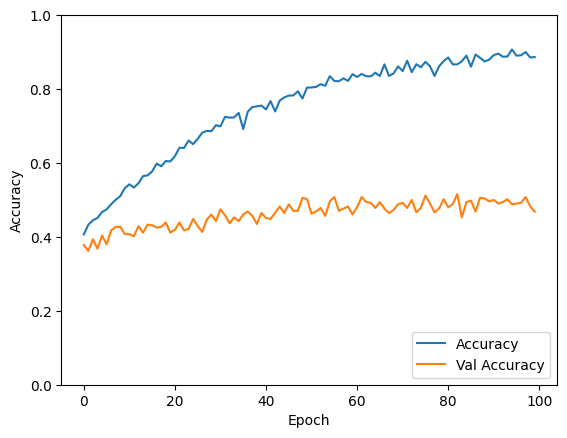

In [30]:
plot_accuraccy(history)

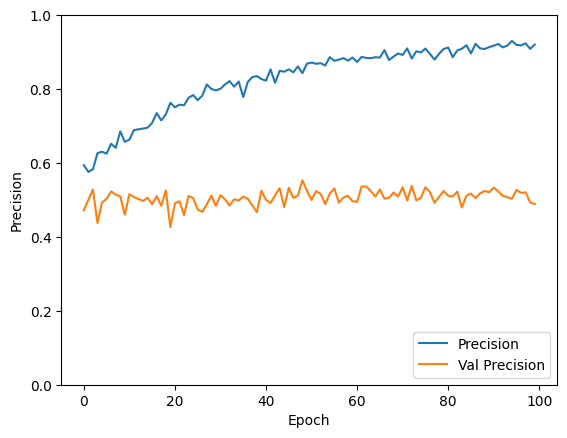

In [25]:
plot_precision(history)

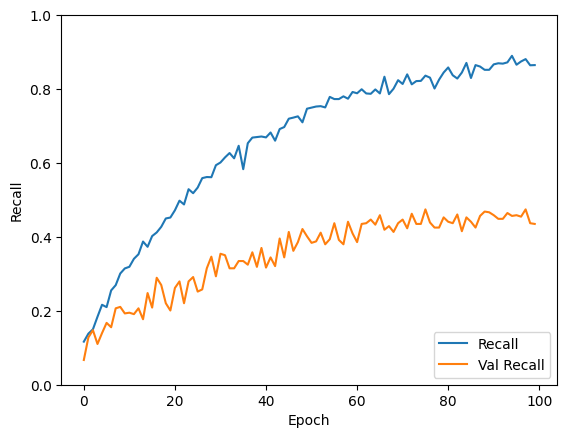

In [26]:
plot_recall(history)

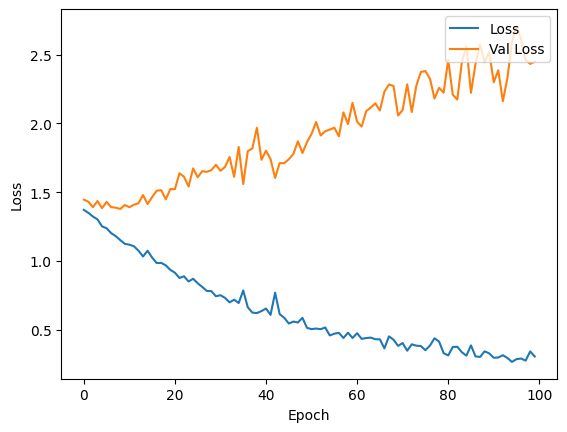

In [27]:
plot_loss(history)

In [28]:
from sklearn.metrics import confusion_matrix

 1/16 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step


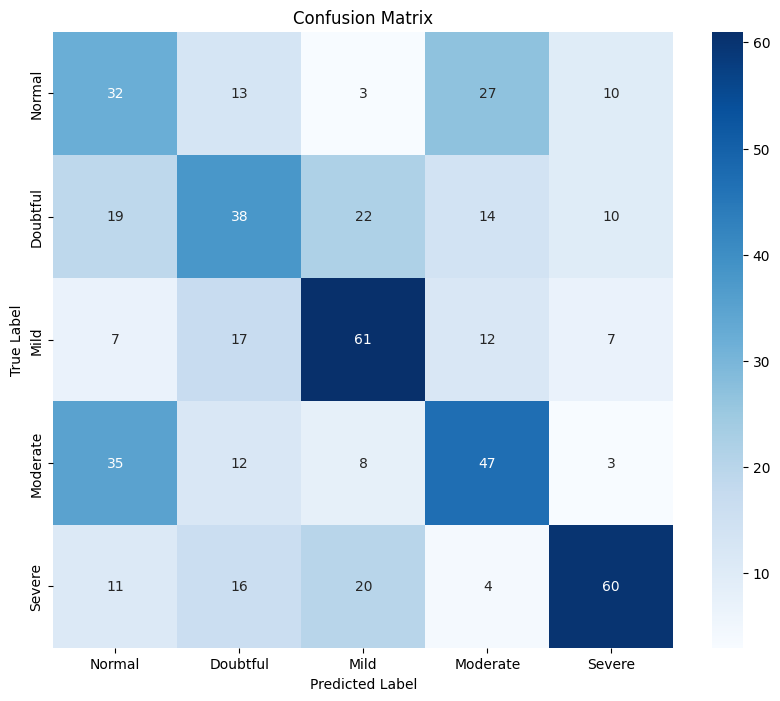

In [29]:
y_pred_prob = model.predict(valid_ds)
y_pred = tf.argmax(y_pred_prob, axis=1)
y_true = tf.argmax(valid_labels, axis=1)

cm = confusion_matrix(y_true, y_pred)



class_names = ['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']

plot_confusion_matrix(cm, class_names)